In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
# ODE
def f(t, y):
    return t - 2 * t * y

# Exact solution
def analytical_solution(y0, t):
    return (y0 - 0.5) * np.exp(-t**2) + 0.5

# Forward Euler method implementation
def euler_method(y0, t0, tn, dt, ode):
    t_values = np.arange(t0, tn + dt, dt)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        # y_{n+1} = y_n + dt * f(t_n, y_n)
        y_values[i] = y_values[i - 1] + dt * ode(t_values[i - 1], y_values[i - 1])
    
    return t_values, y_values

In [128]:
t0 = 0
tn = 3
y0_vals = [-1, 1]
dt_values = [0.3, 0.1]
colors = colors = ['red', 'blue', 'green', 'orange', 'black']

## Plotting the Solutions

In [129]:
def plot_solution(t0, tn, y0, solution, color="black", dt=0.01):
    num_t = int((tn - t0) / dt)
    t_exact = np.linspace(t0, tn, num_t)
    y_exact = solution(y0, t_exact)
    plt.plot(t_exact, y_exact, label=f"Analytical/Exact Solution with $y_0 = {y0}$ and $dt={dt}$", color=color, linewidth=2)
    plt.legend()
    plt.ylabel("$y(t)$")
    plt.xlabel("$t$")

In [144]:
def plot_numerical_solution(dt_values, t0, tn, y0, numerical_method, ode, colors):
    for i, dt in enumerate(dt_values):
        t, y = numerical_method(y0, t0, tn, dt, ode)
        plt.plot(t, y, 'o-', label=f'Euler Method with: $y0={y0}$, $dt={dt}$', color=colors.pop(0), linewidth=2)
        plt.legend()

In [147]:
def plot_and_compare_solutions(dt_values, t0, tn, y0, analytical_solution, numerical_method, ode, colors):
    plot_solution(t0, tn, y0, analytical_solution, color='black')
    plot_numerical_solution(dt_values, t0, tn, y0, numerical_method, ode, colors)

## Plots for Question 2 Part C

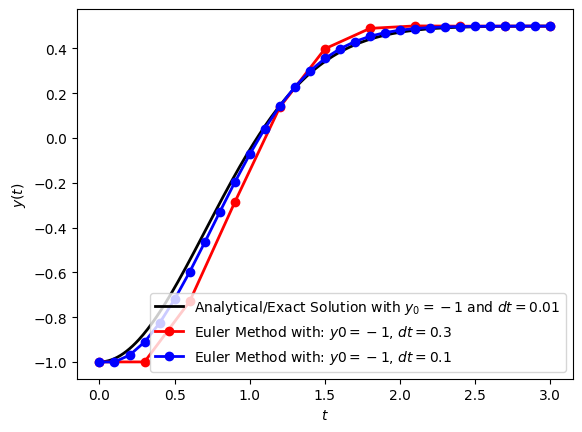

In [148]:
plot_and_compare_solutions(dt_values, t0, tn, y0_vals[0], analytical_solution, euler_method, f, colors)

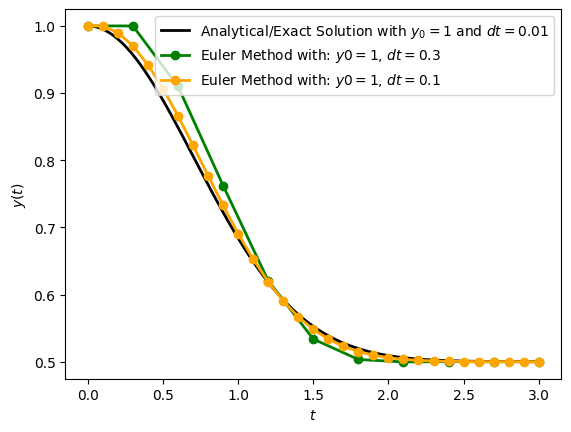

In [150]:
plot_and_compare_solutions(dt_values, t0, tn, y0_vals[1], analytical_solution, euler_method, f, colors)

## Answer to Question 3 Part B

In [308]:
def leaky_if(V, tau_m, E_L, I_x):
    return (1/tau_m) * (-(V - E_L) + I_x)

def leaky_if_solution(t, tau_m, V_infty, V0):
    return V_infty - (V_infty - V0) * np.exp(-t/tau_m)

# Forward Euler method implementation
def euler_method(V0, t0, tn, dt, tau_m, E_L, I_x, V_th, V_reset, ode):
    t_values = np.arange(t0, tn + dt, dt)
    V_values = np.zeros(len(t_values))
    V_values[0] = V0
    
    for i in range(1, len(t_values)):
        # V_{n+1} = V_n + dt * f(V_n)
        V_values[i] = V_values[i - 1] + dt * ode(V_values[i - 1], tau_m, E_L, I_x)
        if V_values[i] > V_th:  # Spike condition
            V_values[i] = V_reset  # Reset after spike
    
    return t_values, V_values

In [309]:
t0 = 0
tn = 2000
dt = 0.1

E_L = -70 #mV
tau_m = 10 # ms
V_th = -50 #mV
V_reset = -65 #mV
V0 = E_L

In [300]:
def plot_numerical_solution(dt, t0, tn, V0, tau_m, E_L, I_x, V_th, V_reset, numerical_method, ode, color):
    t, y = numerical_method(V0, t0, tn, dt, tau_m, E_L, I_x, V_th, V_reset, ode)
    plt.plot(t, y, '-', label=f'Euler Method with: $V_0={V0}$, $dt={dt}$', color=color, linewidth=1)
    plt.axhline(V_th, color='black', linestyle='--', label="Threshold $V_{th}$")
    plt.axhline(V_reset, color='green', linestyle='--', label="Reset $V_{reset}$")
    plt.title("LIF Model Simulation (Forward Euler Method): Membrane Potential (mV) vs. Time (ms)", fontsize=12)
    plt.xlabel("Time (ms)", fontsize=14)
    plt.ylabel("Membrane Potential (mV)", fontsize=14)
    #plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    #plt.legend()

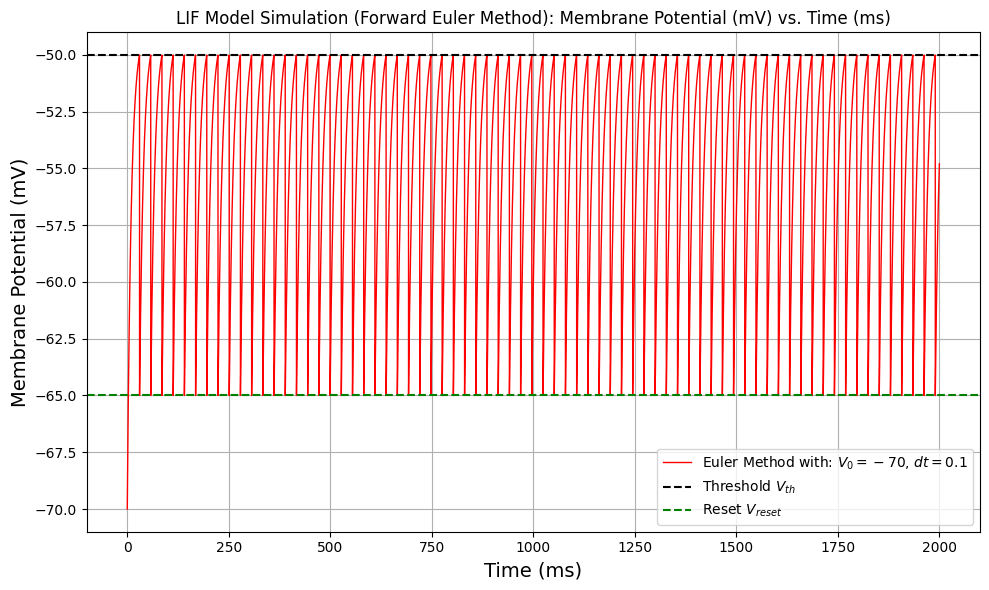

In [295]:
# Input current above V_th
I_x = 21
plt.figure(figsize=(10, 6))
plot_numerical_solution(dt, t0, tn, V0, tau_m, E_L, I_x, V_th, V_reset, euler_method, leaky_if, "red")

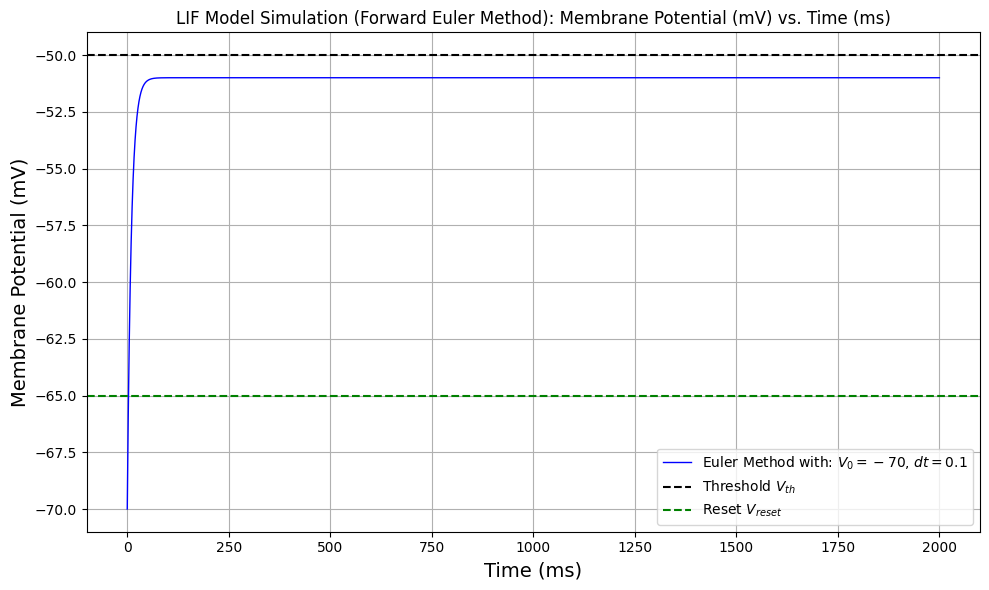

In [296]:
# Input current below V_th
I_x = 19
plt.figure(figsize=(10, 6))
plot_numerical_solution(dt, t0, tn, V0, tau_m, E_L, I_x, V_th, V_reset, euler_method, leaky_if, "blue")

## Answer to Question 3 Part C
### Answer to Question 3 Parts i and ii.

In [377]:
T_values = []

def plot_numerical_solution(dt, t0, tn, V0, tau_m, E_L, I_x, V_th, V_reset, numerical_method, ode, color):
    plt.figure(figsize=(10, 6))
    t, y, T = numerical_method(V0, t0, tn, dt, tau_m, E_L, I_x, V_th, V_reset, ode)
    T_values.append(T)
    plt.plot(t, y, '-', label=f'Euler Method with: $V_0={V0}$, $dt={dt}$', color=color, linewidth=1)
    plt.axhline(V_th, color='black', linestyle='--', label="Threshold $V_{th}$")
    plt.axhline(V_reset, color='green', linestyle='--', label="Reset $V_{reset}$")
    plt.title("LIF Model Simulation (Forward Euler Method): Membrane Potential (mV) vs. Time (ms)", fontsize=12)
    plt.xlabel("Time (ms)", fontsize=14)
    plt.ylabel("Membrane Potential (mV)", fontsize=14)
    plt.grid(True)
    plt.tight_layout()

# Forward Euler method implementation
def euler_method(V0, t0, tn, dt, tau_m, E_L, I_x, V_th, V_reset, ode):
    has_spiked = False
    T1, T2 = -1, -1
    t_values = np.arange(t0, tn + dt, dt)
    V_values = np.zeros(len(t_values))
    V_values[0] = V0
    
    for i in range(1, len(t_values)):
        # V_{n+1} = V_n + dt * f(V_n)
        V_values[i] = V_values[i - 1] + dt * ode(V_values[i - 1], tau_m, E_L, I_x)
        if V_values[i] > V_th:  # Spike condition
            V_values[i] = V_reset  # Reset after spike
            if not has_spiked:
                has_spiked = True
            elif has_spiked and T1 < 0 and T2 < 0:
                T1 = t_values[i]
            elif has_spiked and T1 > 0 and T2 < 0:
                T2 = t_values[i]
            else:
                continue
                
    
    return t_values, V_values, T2 - T1

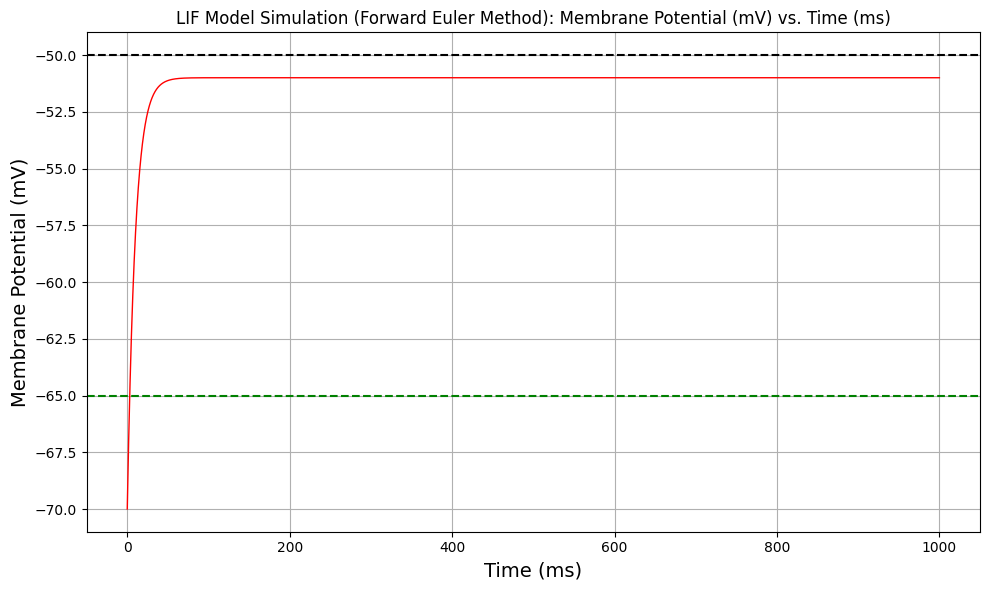

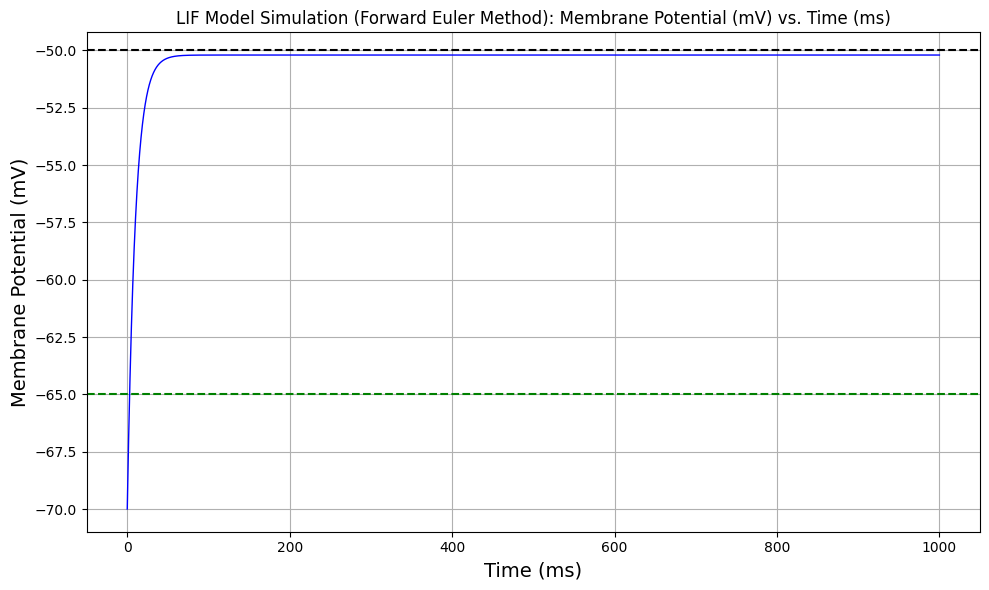

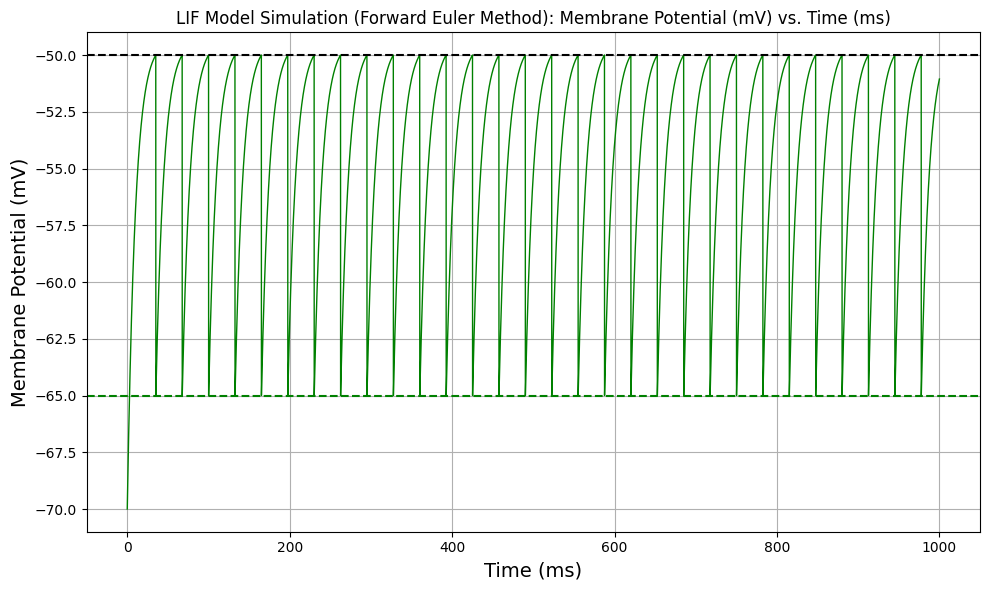

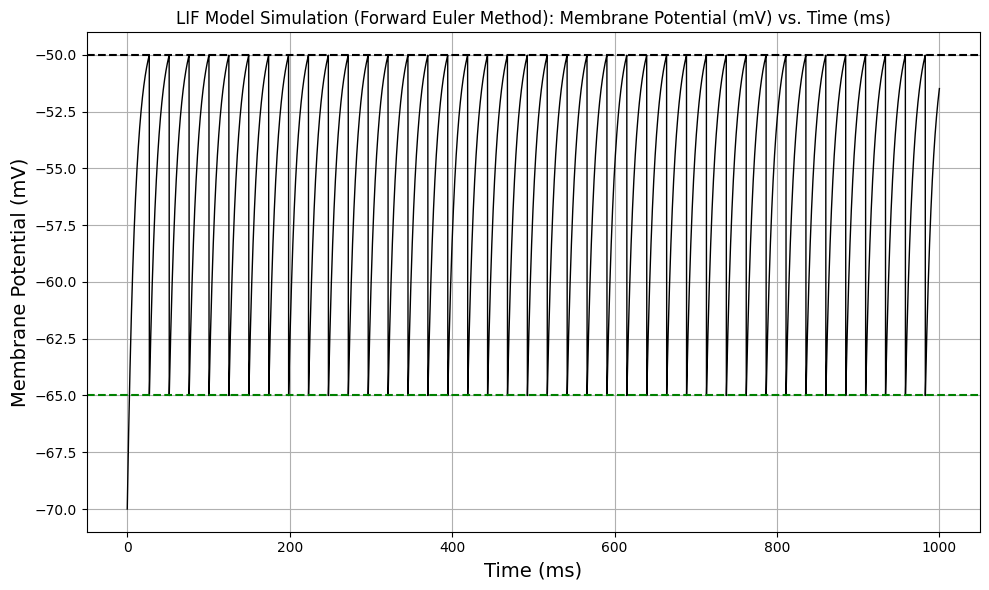

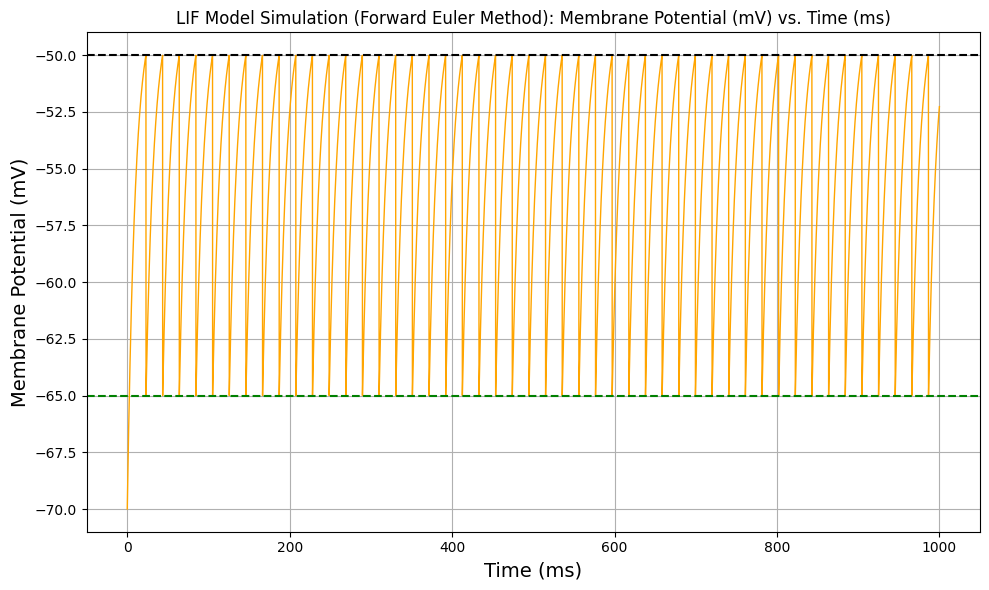

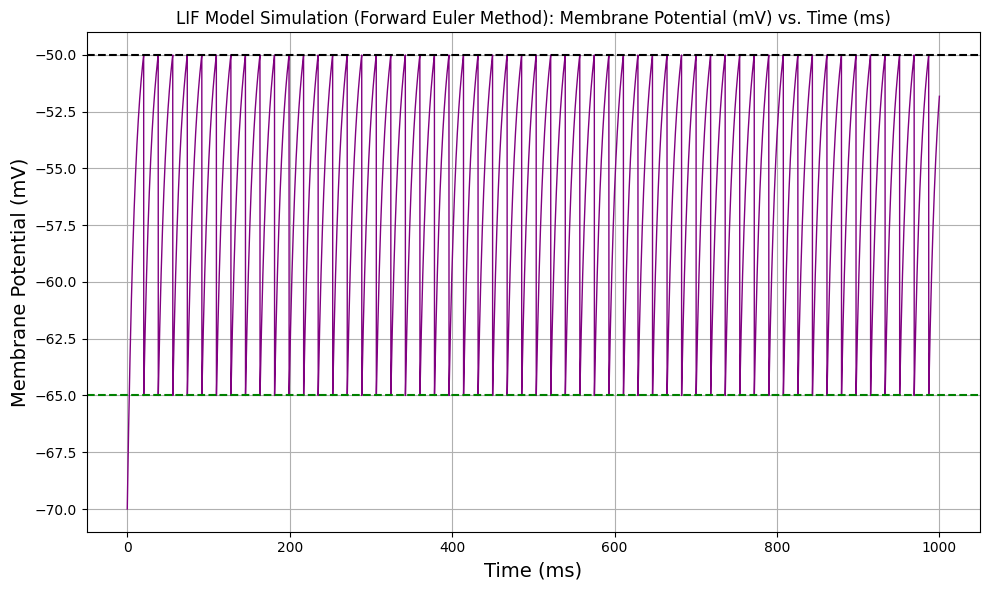

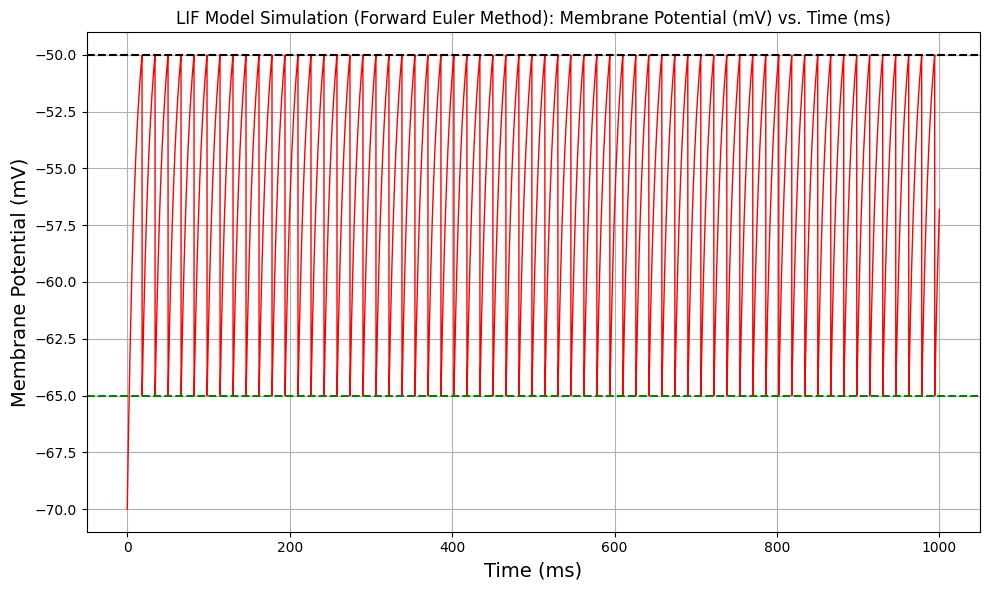

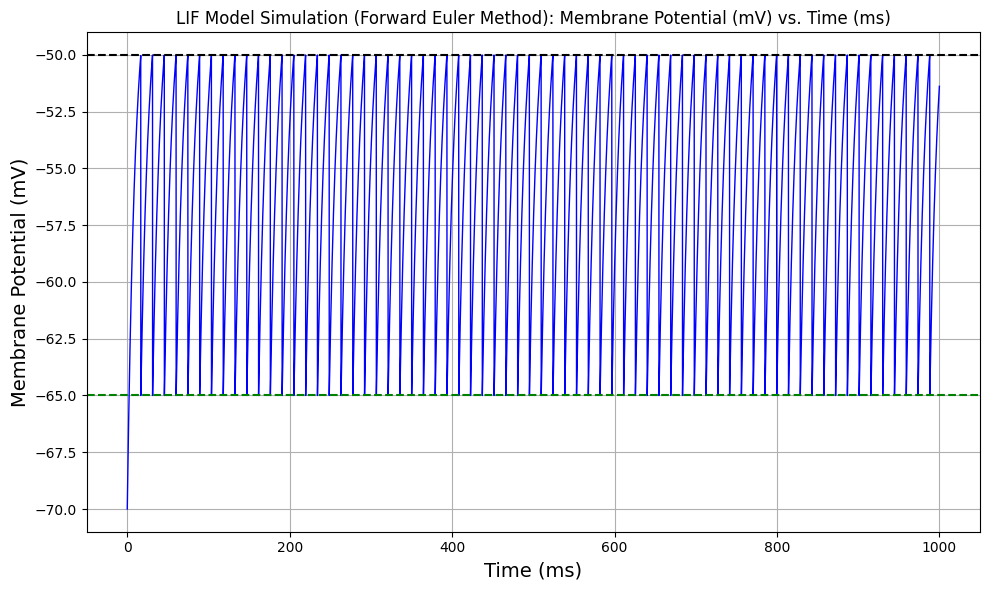

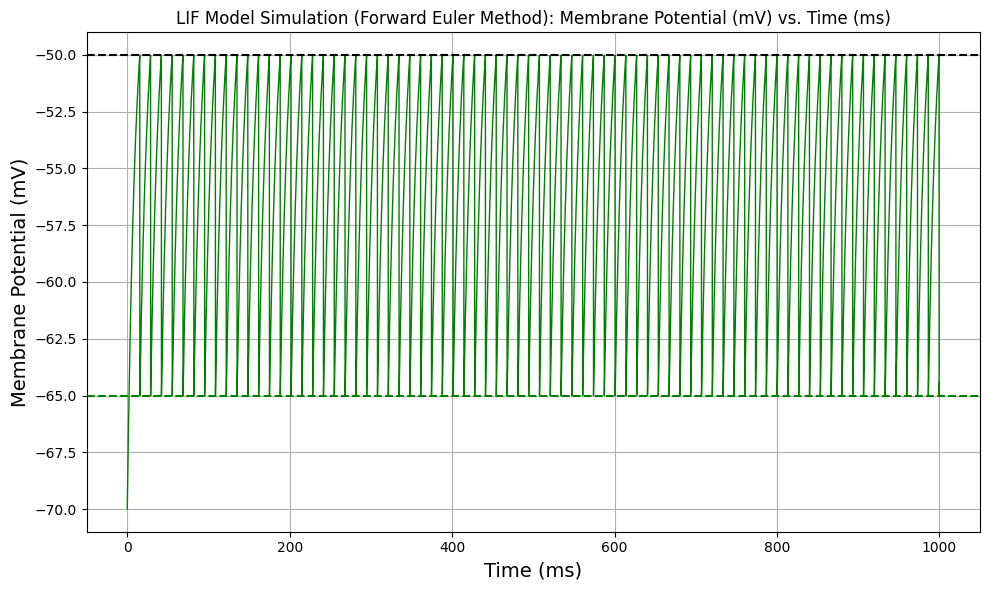

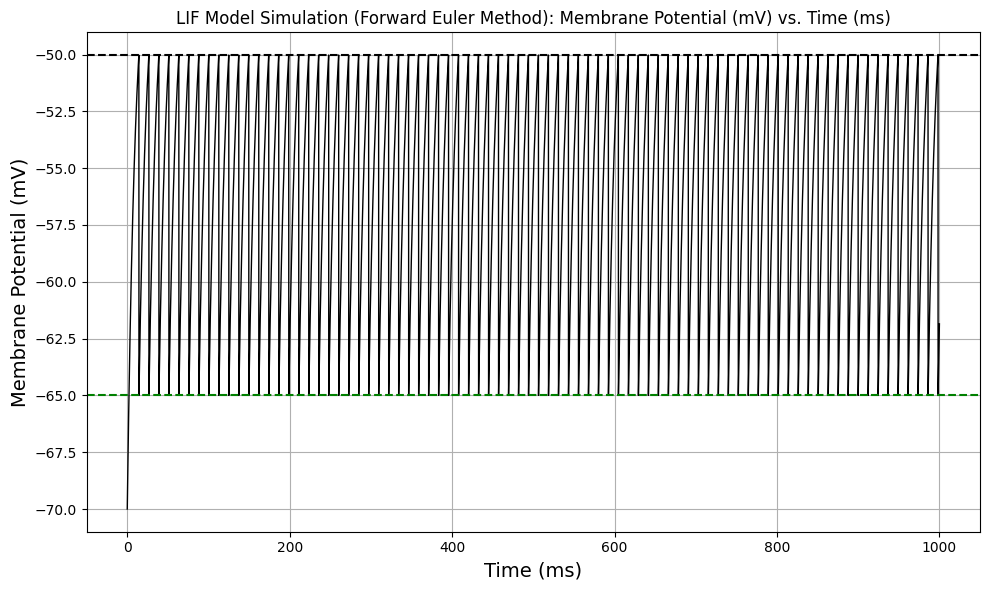

In [378]:
I_values = 19 + 4/5 * np.arange(10)
colors = ["red", "blue", "green", "black", "orange", "purple"]
tn = 1000
for idx, I_x in enumerate(I_values):
    plot_numerical_solution(dt, t0, tn, V0, tau_m, E_L, I_x, V_th, V_reset, euler_method, leaky_if, colors[idx%6])
    plt.show()
    plt.close()

### Answer to Question 3 Part C - Steps iii.

In [344]:
IT_pairs = np.array([I_values, T_values])
print(f"I_x, T\n")
for i in range(IT_pairs.shape[1]):
    print(IT_pairs[:,i])

I_x, T

[19.  0.]
[19.8  0. ]
[20.6 32.5]
[21.4 24.5]
[22.2 20.5]
[23.  17.9]
[23.8 16. ]
[24.6 14.5]
[25.4 13.3]
[26.2 12.3]


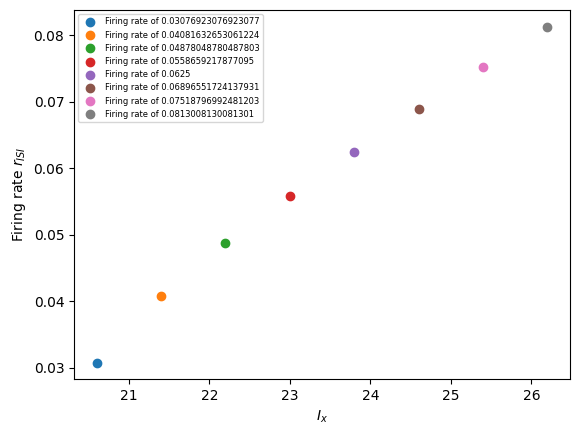

In [361]:
for i in range(IT_pairs.shape[1]):
    if IT_pairs[1,i] > 0:
        plt.scatter(IT_pairs[0, i], 1/IT_pairs[1,i], label=f"Firing rate of {1/IT_pairs[1,i]}")
        plt.xlabel("$I_x$")
        plt.ylabel("Firing rate $r_{ISI}$")
        plt.legend(fontsize=6)

## Answer to Question 3 Part D

In [373]:
V_infty_values = E_L + np.linspace(19, np.max(I_values), 100)
T_exact_values = tau_m * np.log((V_infty_values - V_reset) / (V_infty_values - V_th))
firing_rate_values = 1 / T_exact_values

C:\Users\Teddy\AppData\Local\Temp\ipykernel_12540\1101866656.py:2: RuntimeWarning: invalid value encountered in log
  T_exact_values = tau_m * np.log((V_infty_values - V_reset) / (V_infty_values - V_th))


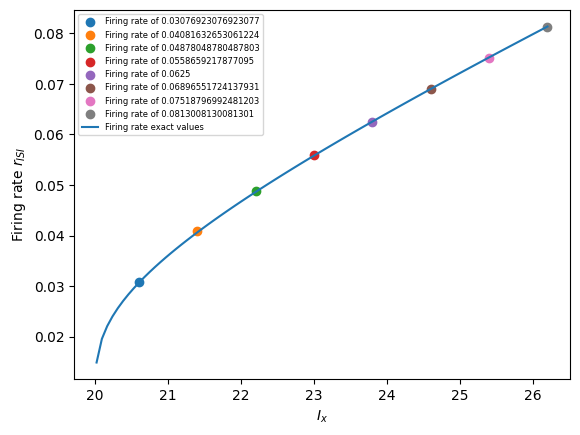

In [376]:
for i in range(IT_pairs.shape[1]):
    if IT_pairs[1,i] > 0:
        plt.scatter(IT_pairs[0, i], 1/IT_pairs[1,i], label=f"Firing rate of {1/IT_pairs[1,i]}")
        plt.scatter
        plt.xlabel("$I_x$")
        plt.ylabel("Firing rate $r_{ISI}$")
        plt.legend(fontsize=6)
        
plt.plot(np.linspace(19, np.max(I_values), 100), firing_rate_values, label=f"Firing rate exact values")
plt.legend(fontsize=6)

***
***
***